# 1. Importing Dataset

In [50]:
import streamlit as st

In [51]:
# Importing essential library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Exploring Dataset

In [52]:
#Importing Dataset
df = pd.read_csv('autos_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [53]:
df.shape

(398, 9)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# 2. Data Cleaning

In [55]:
# Checking if there is any missing values
from tabulate import tabulate
def missingvaluesin_table(data):
    # percentage of missingvalue
    total_percentage_missing = (((data.isnull() | data.isna() | (data == '') | (data == '0')).sum().sum()/ (data.size)) * 100).round(2)
    print("Total missing values in percentage:",total_percentage_missing,"%")
    
    # count missing values
    missing_values=(data.isnull() | data.isna() | (data == '') | (data == '0')).sum()
    # missing values in percentage
    missing_in_percentage=((missing_values/len(data))*100).round(2)
    
    # creating dataframe to show in tabulate view
    temp={"missing count":missing_values,"missing values in %":missing_in_percentage}
    temp_data=pd.DataFrame(temp)
    #print table
    print(tabulate(temp_data,headers='keys',tablefmt='pretty'))
missingvaluesin_table(df)

Total missing values in percentage: 0.0 %
+--------------+---------------+---------------------+
|              | missing count | missing values in % |
+--------------+---------------+---------------------+
|     mpg      |      0.0      |         0.0         |
|  cylinders   |      0.0      |         0.0         |
| displacement |      0.0      |         0.0         |
|  horsepower  |      0.0      |         0.0         |
|    weight    |      0.0      |         0.0         |
| acceleration |      0.0      |         0.0         |
|  model_year  |      0.0      |         0.0         |
|    origin    |      0.0      |         0.0         |
|   car_name   |      0.0      |         0.0         |
+--------------+---------------+---------------------+


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [57]:
# Getting unique values in Horsepower column
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [58]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


* Filling the missing values in the horsepower column using the formula [(Acceleration x Weight)/550 ]

In [59]:
#Implementing the formula to fill the missing value
df.loc[df['horsepower']=='?','horsepower'] = ((df.loc[df['horsepower']=='?','acceleration'] * df.loc[df['horsepower']=='?','weight'] ) / 550)

# 3. Exlporatory data Analysis(EDA)

In [60]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


* Creating two columns named Company name and Model name and dropping the column car_name

In [61]:
# Creating a copy dataframe
df_copy = df.copy()

In [62]:
#Getting unique values in cylinders
df_copy['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [63]:
#Getting unique values in model year
df_copy['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [64]:
df_copy['origin'].unique()

array([1, 3, 2], dtype=int64)

In [65]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [66]:
# Creating a Column names Automobile Company to retrieve the Company Name
df_copy['Company Name'] = df_copy['car_name'].apply(lambda x: x.split()[0])

#Creating a Column nameed Model name to retrieve the Model name
df_copy['Model Name'] = df_copy['car_name'].apply(lambda x: ' '.join(x.split()[1:]))

#Droping the Column 'car_name' 
df_copy.drop(columns=['car_name'],inplace=True)

# Type Casting the horsepower column
df_copy['horsepower'] = df_copy['horsepower'].astype(int) 

In [67]:
# Decoding the origin column
df_copy_origin = df_copy[df_copy['origin'] == 1]
df_copy_origin['Company Name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'chevy', 'hi', 'mercury', 'oldsmobile', 'chrysler',
       'chevroelt', 'capri', 'cadillac'], dtype=object)

* 1 in Origin denotes cars manufactured in United states

In [68]:
# Decoding the origin column
df_copy_origin = df_copy[df_copy['origin'] == 2]
df_copy_origin['Company Name'].unique()

array(['volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'opel', 'fiat',
       'volvo', 'renault', 'vw', 'mercedes-benz', 'mercedes', 'vokswagen',
       'triumph'], dtype=object)

* 2 in Origin denotes cars manufactured in Europe

In [69]:
# Decoding the origin column
df_copy_origin = df_copy[df_copy['origin'] == 3]
df_copy_origin['Company Name'].unique()

array(['toyota', 'datsun', 'mazda', 'toyouta', 'maxda', 'honda', 'subaru',
       'nissan'], dtype=object)

* 3 in Origin denotes cars manufactured in Japan

In [70]:
# Altering the name of the car from 'hi 1200d' to 'Harvester 1200d'
df_copy.loc[df_copy['Company Name'] == 'hi','Company Name'] = 'Harvester'

# Handling typos values in Company name
df_copy.loc[df_copy['Company Name'] == 'vokswagen','Company Name'] = 'volkswagen'
df_copy.loc[df_copy['Company Name'] == 'vw','Company Name'] = 'volkswagen'
df_copy.loc[df_copy['Company Name'] == 'chevy','Company Name'] = 'chevrolet'
df_copy.loc[df_copy['Company Name'] == 'chevroelt','Company Name'] = 'chevrolet'
df_copy.loc[df_copy['Company Name'] == 'toyouta','Company Name'] = 'toyota' 
df_copy.loc[df_copy['Company Name'] == 'mercedes','Company Name'] = 'mercedes-benz' 

# Checking the typos have been taken
df_copy['Company Name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'Harvester', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'maxda',
       'honda', 'subaru', 'capri', 'mercedes-benz', 'cadillac', 'triumph',
       'nissan'], dtype=object)

In [71]:
# Modifying the values of the origin Column for EDA

df_copy.loc[df_copy['origin']==1,'origin'] = 'American'

df_copy.loc[df_copy['origin']==2,'origin'] = 'European'

df_copy.loc[df_copy['origin']==3,'origin'] = 'Japanese' 

C:\Users\rvikr\AppData\Local\Temp\ipykernel_9504\2594222112.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'American' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy['origin']==1,'origin'] = 'American'


In [72]:
# Checking wheather there is any non numerical value
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   Company Name  398 non-null    object 
 9   Model Name    398 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 29.7+ KB


In [73]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df_copy_numeric = df_copy.copy()

for i in  df_copy_numeric.select_dtypes(include='object').columns:
    df_copy_numeric[i]=label_encoder.fit_transform(df_copy_numeric[i])

In [74]:
df_copy_numeric.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Company Name,Model Name
0,18.0,8,307.0,130,3504,12.0,70,0,7,94
1,15.0,8,350.0,165,3693,11.5,70,0,4,270
2,18.0,8,318.0,150,3436,11.0,70,0,22,262
3,16.0,8,304.0,150,3433,12.0,70,0,1,252
4,17.0,8,302.0,140,3449,10.5,70,0,12,282


In [75]:
df_copy['origin'].unique()

array(['American', 'Japanese', 'European'], dtype=object)

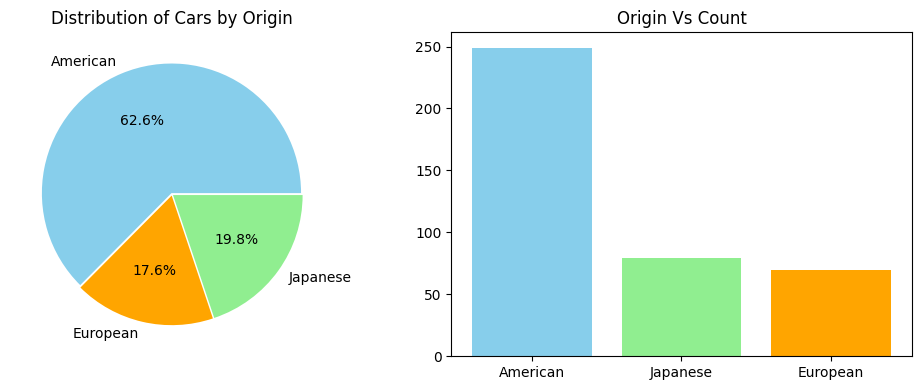

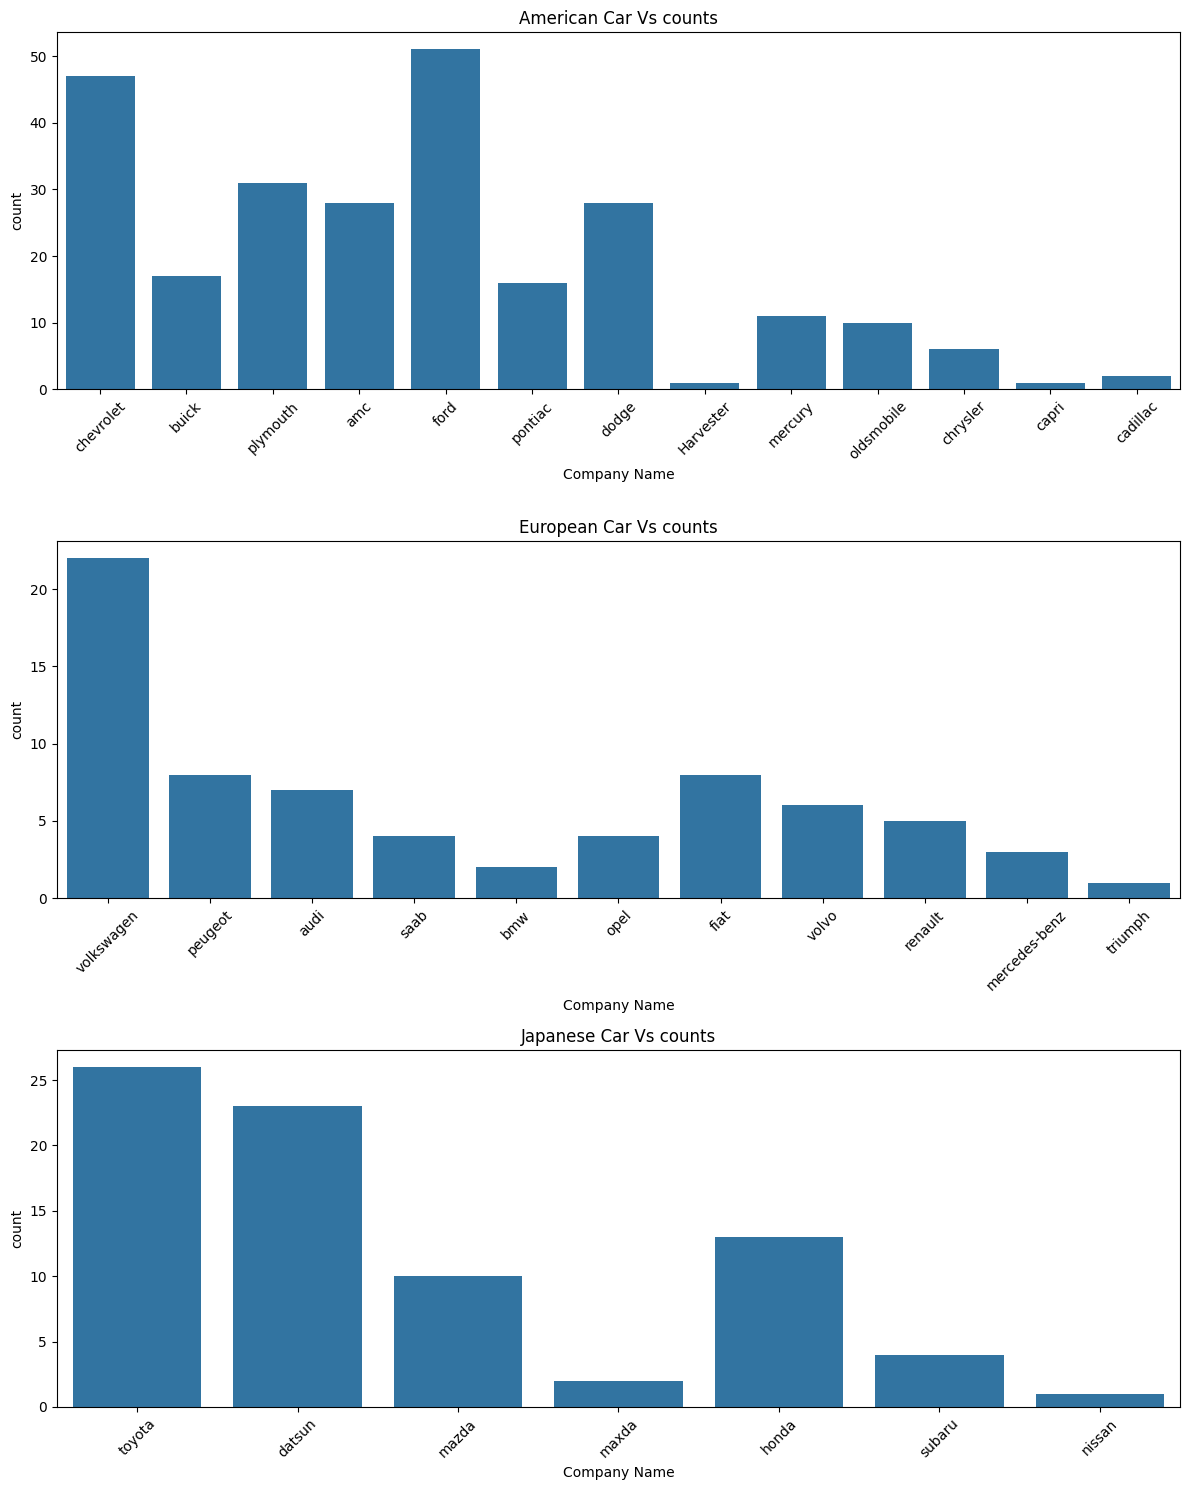

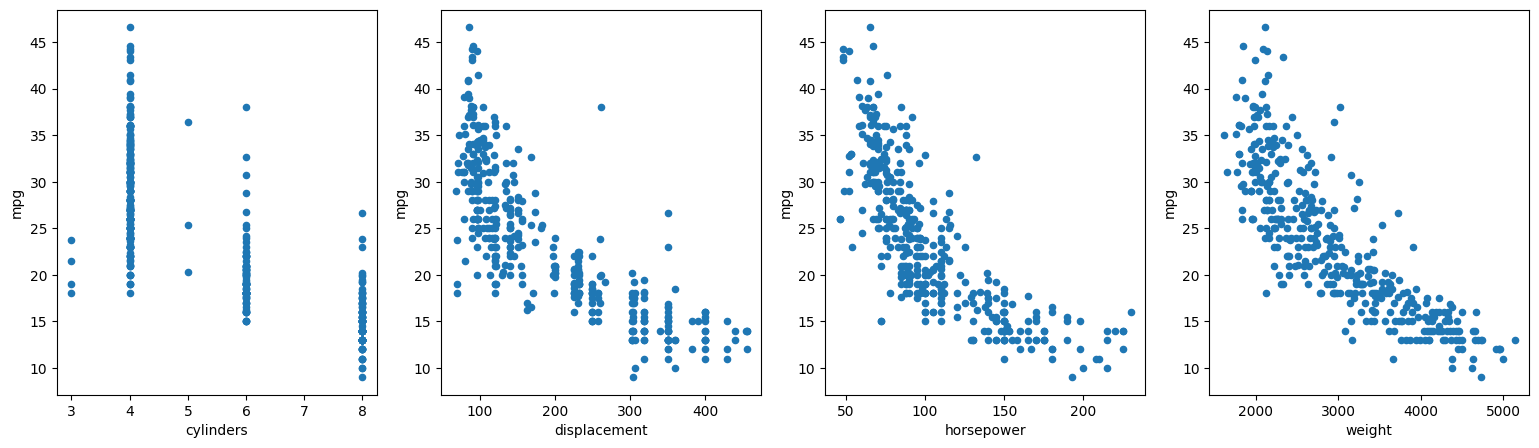

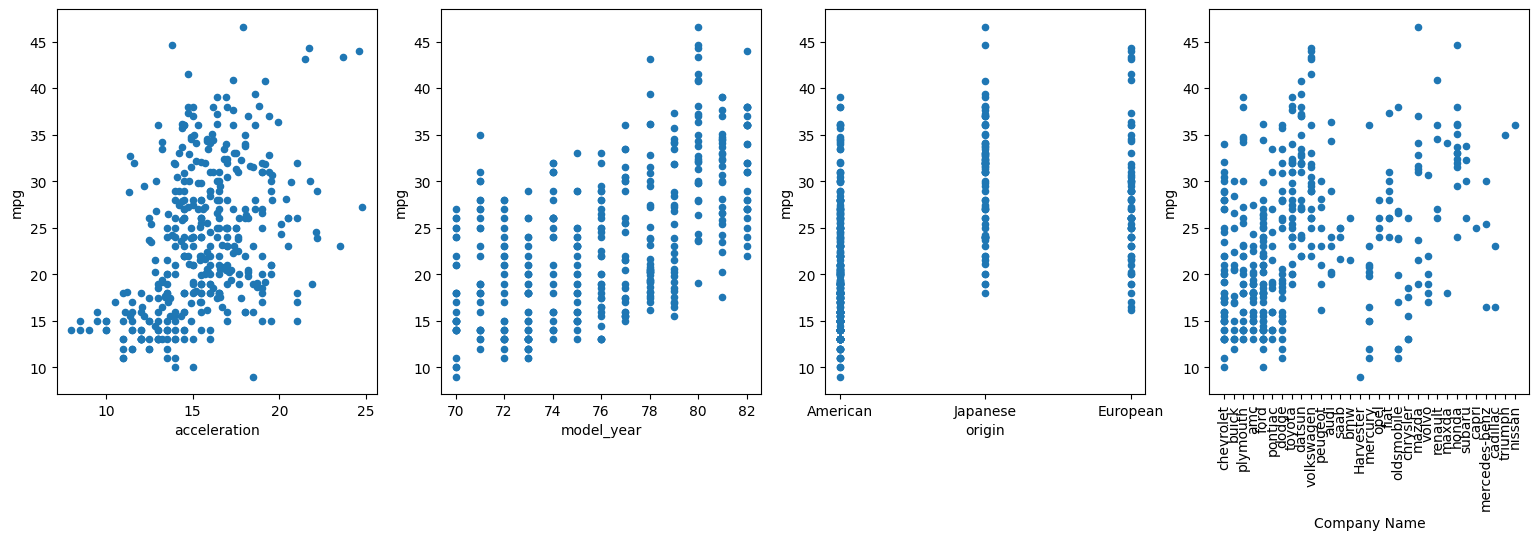

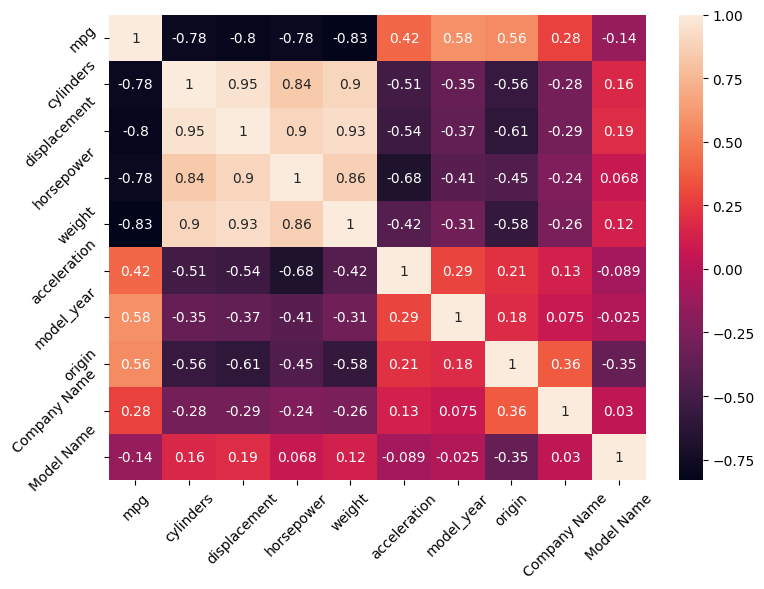

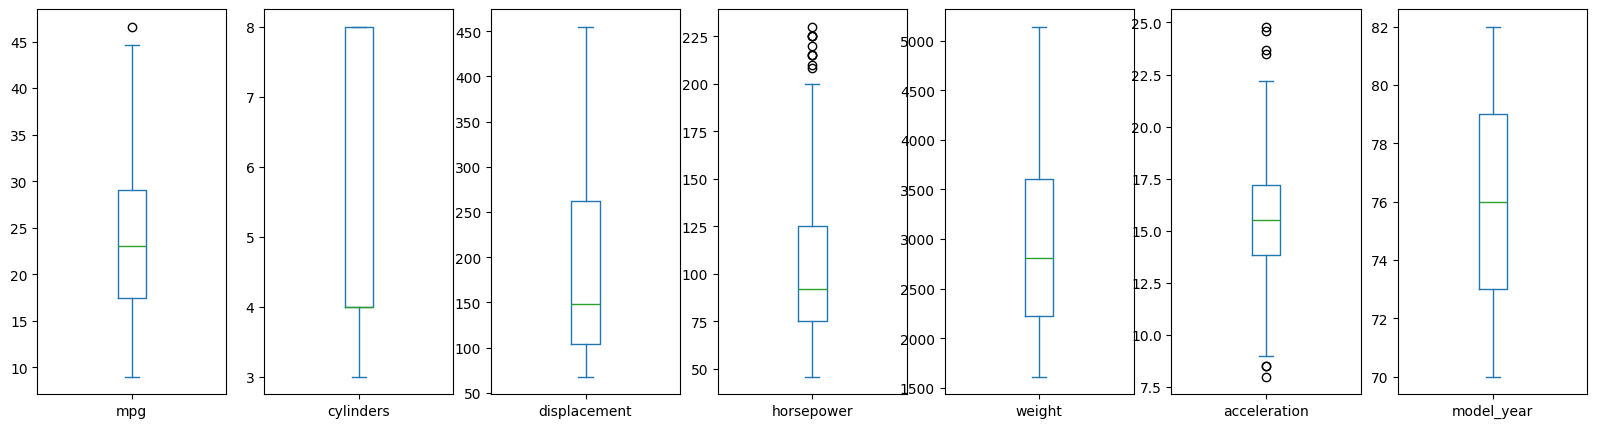

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

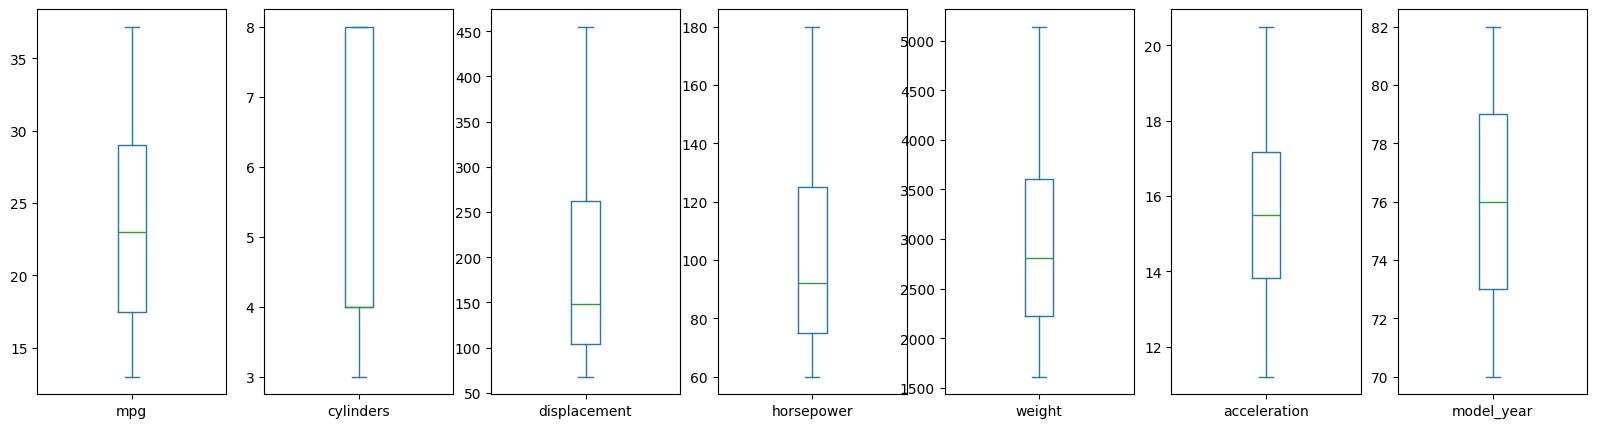

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

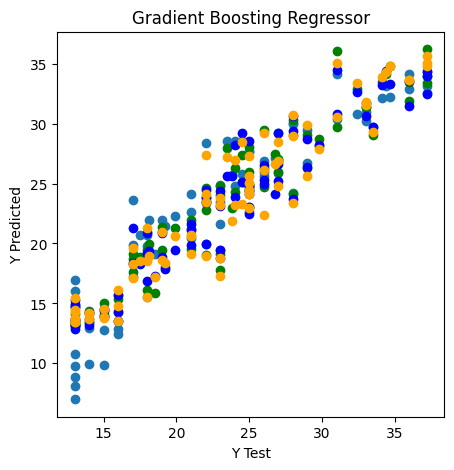

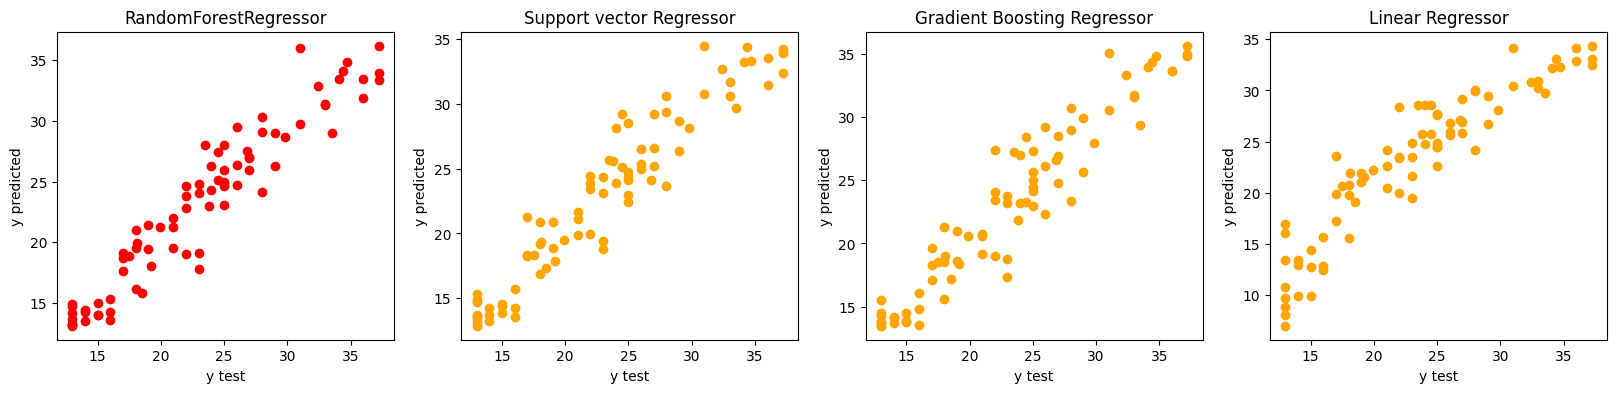

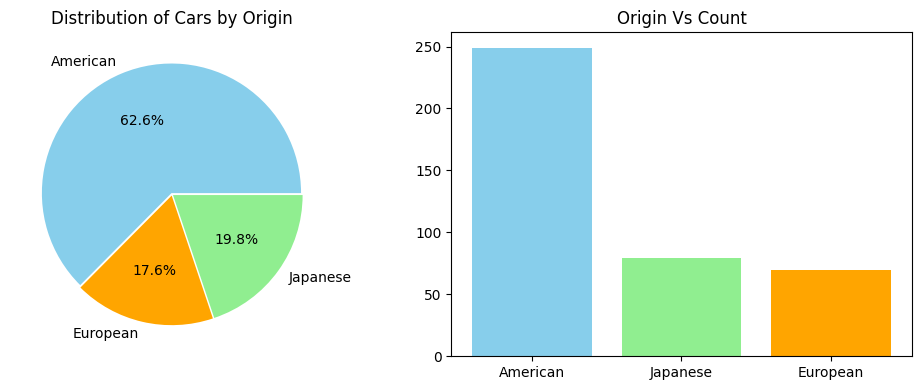

In [76]:
# Plotting the distribution of cars by origin
american = df_copy[df_copy['origin'] =='American']
european = df_copy[df_copy['origin'] == 'European']
japanese = df_copy[df_copy['origin'] == 'Japanese']



size = [len(american),len(european),len(japanese)]
labels=['American','European','Japanese']

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].pie(size,autopct='%.1f%%',colors=['skyblue','orange','lightgreen'],labels=labels,explode=[0.01,0.01,0.01])
ax[0].set_title('Distribution of Cars by Origin')

origin_counts = df_copy['origin'].value_counts()

ax[1].bar(origin_counts.index,origin_counts.values,label=labels,color=['skyblue','lightgreen','orange'])
ax[1].set_title('Origin Vs Count')

plt.tight_layout()
plt.show()



From the above plot
* From the Dataset ,Majority of the cars are American cars and European and Japanese cars are almost equal

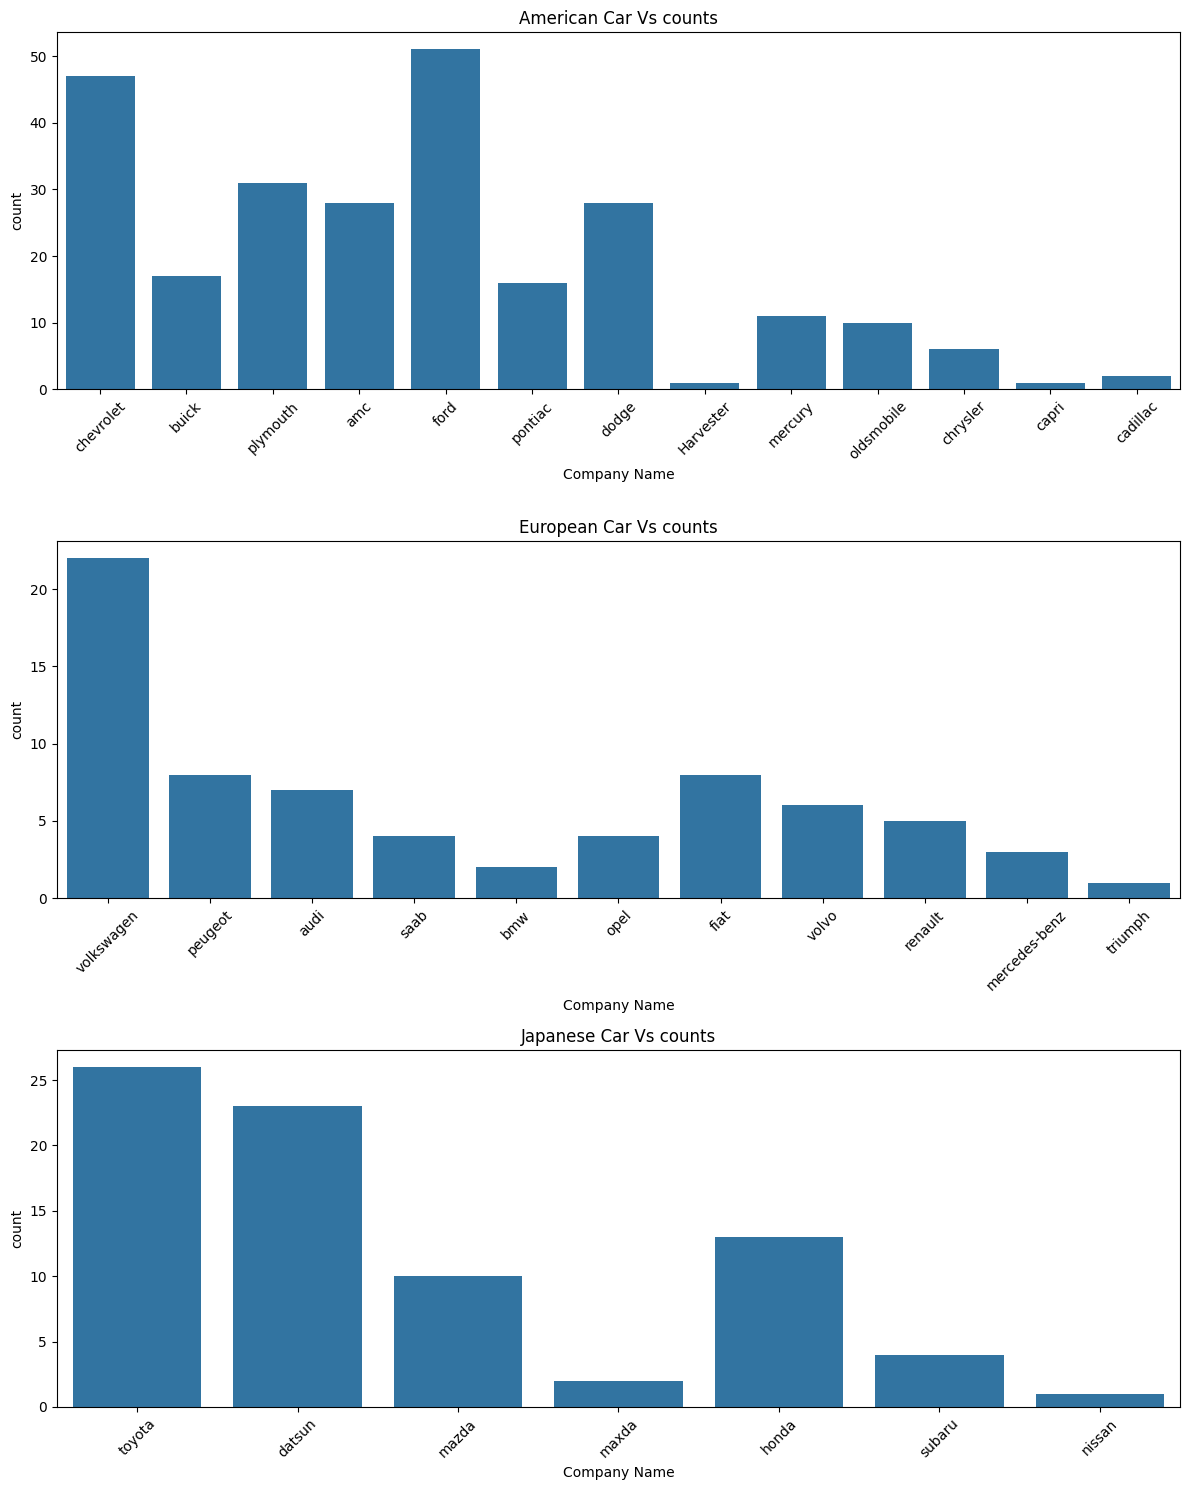

In [77]:
# Plotting Cars count vs country
fig, ax = plt.subplots(3, 1, figsize=(12,15))
sns.countplot(data=american,x='Company Name',ax=ax[0])
ax[0].set_title('American Car Vs counts')
ax[0].tick_params(axis='x', rotation=45) 


sns.countplot(data=european,x='Company Name',ax=ax[1])
ax[1].set_title('European Car Vs counts')
ax[1].tick_params(axis='x', rotation=45) 

sns.countplot(data=japanese,x='Company Name',ax=ax[2])
ax[2].set_title('Japanese Car Vs counts')
ax[2].tick_params(axis='x', rotation=45) 



plt.tight_layout()
plt.show()


* Plotting Scatter plot to find any pattern related to get a high mpg(Mileage per Gallon)

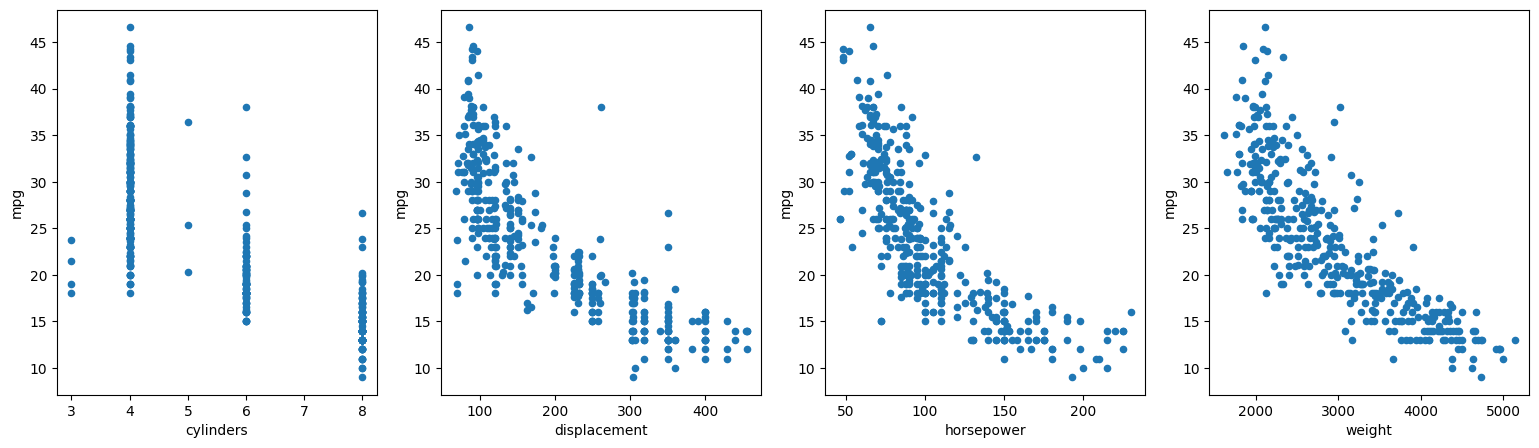

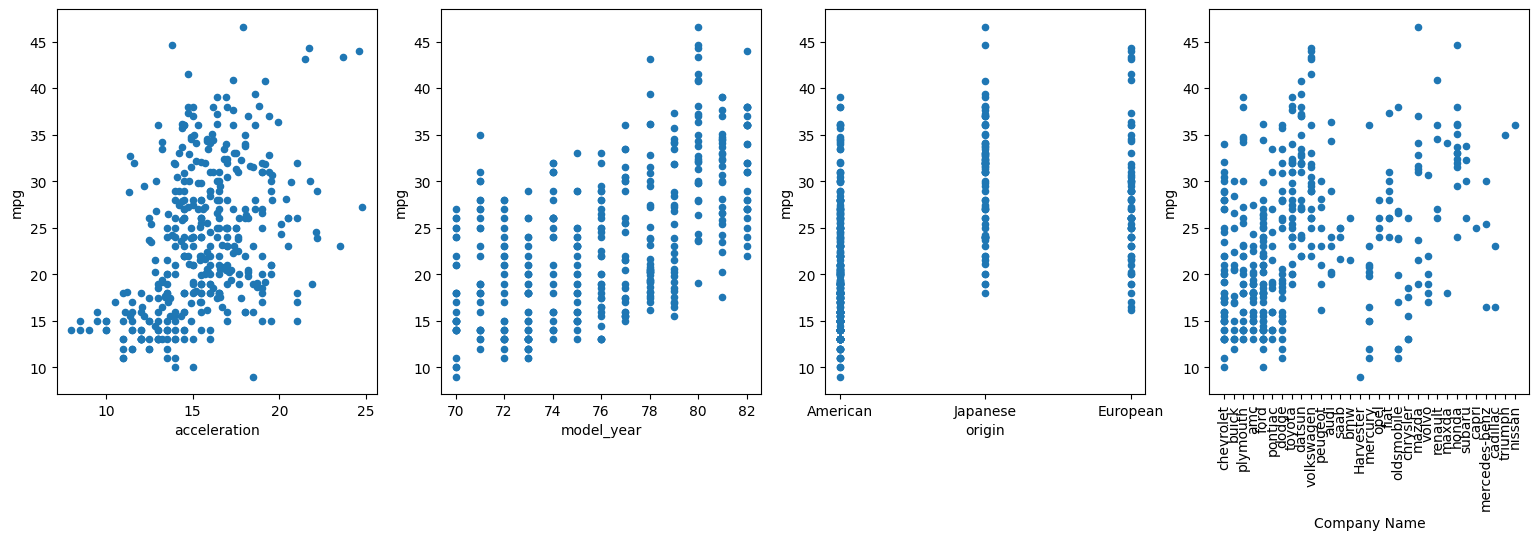

In [78]:
# Plotting Scatter plot
bins = ['cylinders', 'displacement', 'horsepower', 'weight'],['acceleration', 'model_year', 'origin', 'Company Name']

fig , ax = plt.subplots(1,4,figsize=(19,5))
for j,i in enumerate(bins[0],0):
    df_copy.plot(x=i,y='mpg',kind='scatter',ax=ax[j]) 

plt.show()

fig , ax = plt.subplots(1,4,figsize=(19,5))
for j,i in enumerate(bins[1],0):
    df_copy.plot(x=i,y='mpg',kind='scatter',ax=ax[j]) 
    if (i == 'Company Name'):
        plt.xticks(rotation=90)

### Key Insight:
* The variables cylinders, Horsepower, Displacement, and weight exhibit an inverse relationship with mpg (miles per gallon) in the dataset.
* Acceleration and model year demonstrate a direct proportionality with mpg (miles per gallon) in the dataset.
* The presence of discernible patterns in these columns indicates their significance as key features for training the model.

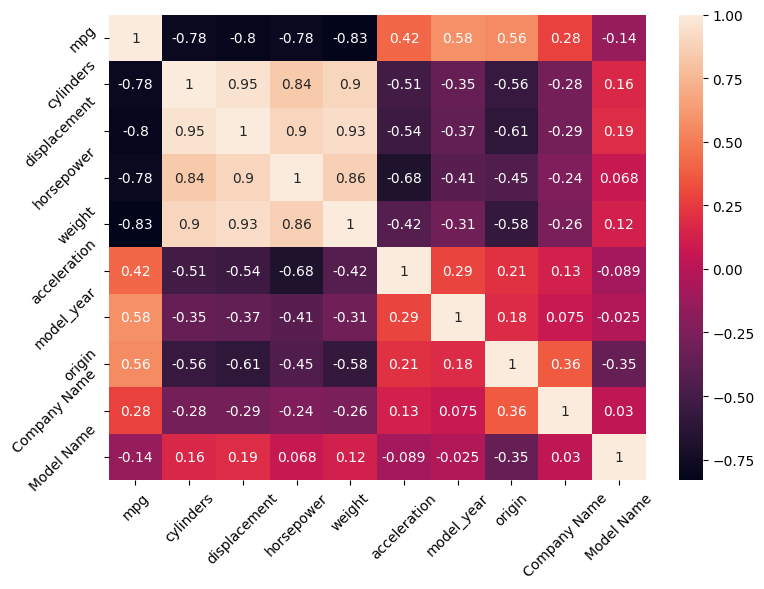

In [79]:
#plotting Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df_copy_numeric[[col for col in df_copy_numeric.columns]].corr(),annot=True)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Data Preprocessing


In [80]:
df_model = df_copy.copy()

In [81]:
df_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Company Name,Model Name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford,torino


In [82]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   Company Name  398 non-null    object 
 9   Model Name    398 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 29.7+ KB


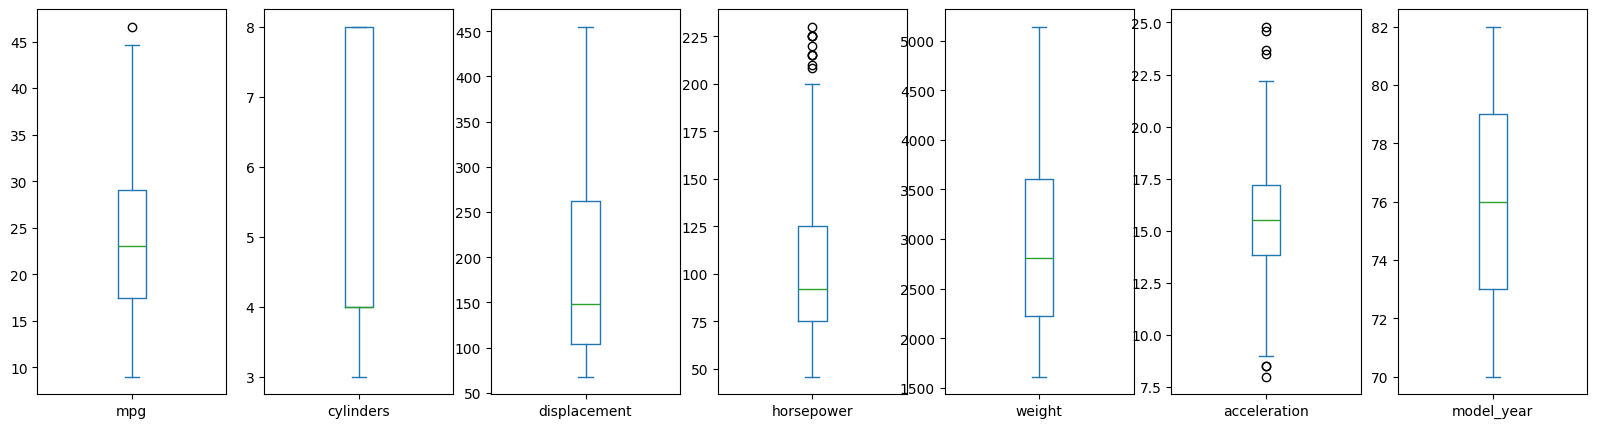

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [83]:
# Finding if there is any outliers
fig ,ax = plt.subplots(1,7, figsize=(20,5))

for j,i in enumerate(df_model.select_dtypes(include=[np.number]).columns):
    plt.figure(figsize=(5,5))
    df_model[i].plot(kind='box',ax=ax[j])
    
plt.show()
plt.tight_layout()

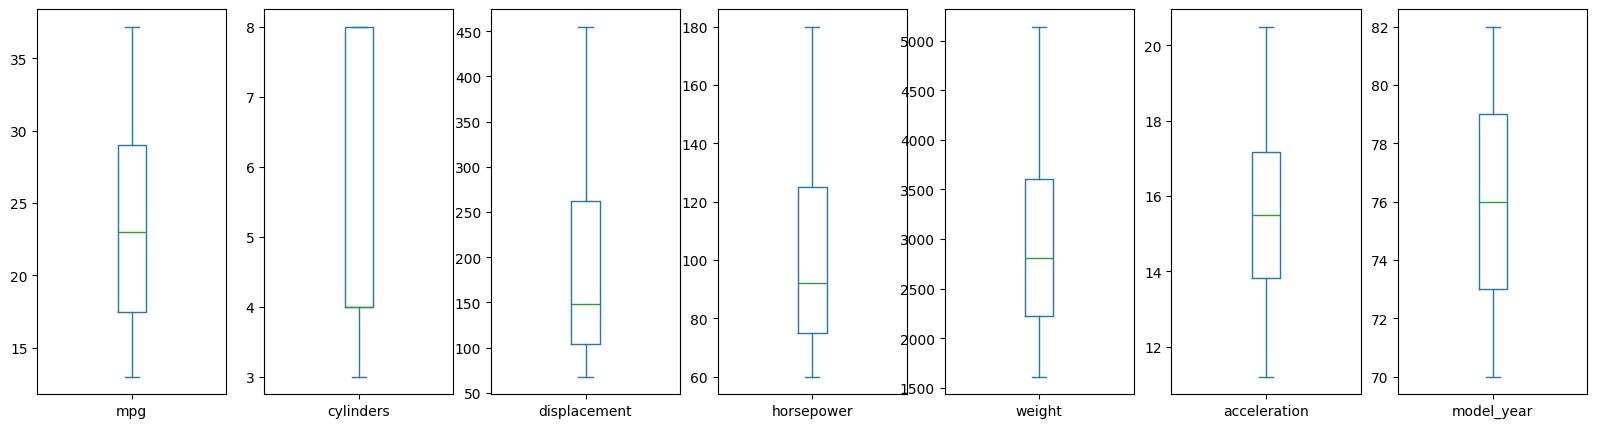

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [84]:
# Importing essential Library to deal with the outliers
from scipy.stats.mstats import winsorize
for i in ['mpg','horsepower','acceleration']:
    df_model[i] = winsorize(df_model[i], limits=[0.05, 0.05])

fig ,ax = plt.subplots(1,7, figsize=(20,5))

for j,i in enumerate(df_model.select_dtypes(include=[np.number]).columns):
    plt.figure(figsize=(5,5))
    df_model[i].plot(kind='box',ax=ax[j])

plt.show()
plt.tight_layout()

In [85]:
df_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Company Name,Model Name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick,skylark 320
2,18.0,8,318.0,150,3436,11.2,70,American,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc,rebel sst
4,17.0,8,302.0,140,3449,11.2,70,American,ford,torino


# 5. Machine Learning
* Implementing regression models such as Linear Regression, Random Forest Regressor, Support Vector Regressor, and Gradient Boosting to analyze continuous data.

* Utilizing regression-based machine learning models due to the continuous nature of the data, focusing on predictive accuracy and performance evaluation.

* Evaluating each model's performance using metrics tailored for regression tasks, ensuring robust comparison and selection of the most effective model.

* Employing techniques such as Grid Search and Cross-Validation to optimize model parameters and enhance predictive capabilities.

In [86]:
# Importing essential methods from the respective library
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import r2_score ,mean_squared_error as mse

# Splitting the Dataframe from Machine Learning
x = df_model.drop(['mpg','origin','Company Name','Model Name','Company Name','Model Name'],axis=1)
y = df_model['mpg']
x_train , x_test , y_train , y_test = tts(x, y, test_size=0.2,random_state=42)

# Scalling the data to implement in ML model
from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()

x_train=Standard_Scaler.fit_transform(x_train)
x_test=Standard_Scaler.transform(x_test) 


In [87]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130,3504,12.0,70
1,8,350.0,165,3693,11.5,70
2,8,318.0,150,3436,11.2,70
3,8,304.0,150,3433,12.0,70
4,8,302.0,140,3449,11.2,70
...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82
394,4,97.0,60,2130,20.5,82
395,4,135.0,84,2295,11.6,82
396,4,120.0,79,2625,18.6,82


## i). Linear Regression

The R2 Score : 83.9 %
The Mean Squared Error: 7.82


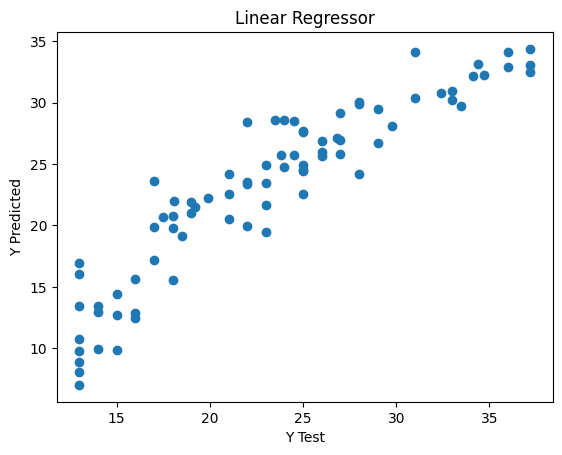

In [88]:
# Importing Linear regression Model
from sklearn.linear_model import LinearRegression
LinearRegression_model = LinearRegression()
 
# Training the Linear Regresion Model
LinearRegression_model.fit(x_train,y_train)
y_pred_Linear_Regression = LinearRegression_model.predict(x_test)

r2_score_linear = (r2_score(y_test,y_pred_Linear_Regression)*100).round(2)
mse_linear =((mse(y_test,y_pred_Linear_Regression).round(2)))

# Printing R2 score and Mse
print( "The R2 Score :",r2_score_linear,"%")
print("The Mean Squared Error:",mse_linear)

plt.scatter(y_test,y_pred_Linear_Regression)
plt.title('Linear Regressor')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

## ii). Random Forest Regression

In [89]:
# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor_model = RandomForestRegressor()

RandomForestRegressor_model.fit(x_train,y_train)

RandomForestRegressor()

###  Using GridsearchCV for Hyperparamter Tuning

In [90]:
#Importing GridsearchCV
from sklearn.model_selection import GridSearchCV

'''# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20,30,40,50],
    'min_samples_split': range(2,10,1),
    'min_samples_leaf':range(1,10,1),
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor_model,param_grid=param_grid,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)'''

"# Define the parameter grid\nparam_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20,30,40,50],\n    'min_samples_split': range(2,10,1),\n    'min_samples_leaf':range(1,10,1),\n    'max_features': ['auto', 'sqrt', 'log2']\n}\n\ngrid_search = GridSearchCV(estimator=RandomForestRegressor_model,param_grid=param_grid,cv=5,n_jobs=-1)\ngrid_search.fit(x_train,y_train)\nprint(grid_search.best_params_)"

### From Grid Search
* From gridsearchCV , the suitable hyper parameters are obtained and they are:
bootstrap=False,max_depth=50,max_features='log2',min_samples_leaf=2,min_samples_split=6,n_estimators=100

R2 Score               : 92.0 %
The Mean Squared error : 3.84


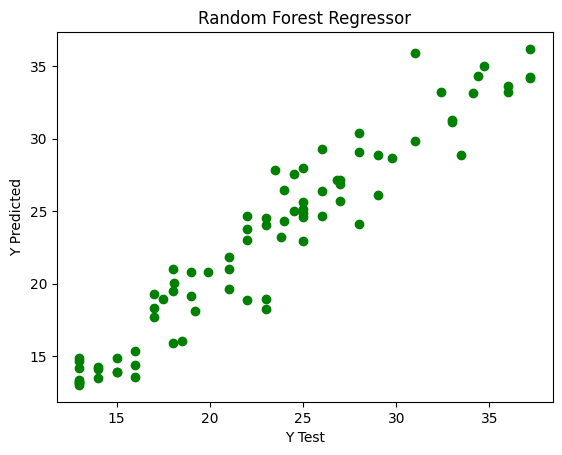

In [91]:
# Implementing the paraaters after the grid search
Random_Forest_Regressor_model = RandomForestRegressor(bootstrap=False,max_depth=50,max_features='log2',min_samples_leaf=2,min_samples_split=6,n_estimators=100)
Random_Forest_Regressor_model.fit(x_train,y_train)

y_pred_Randomforest = Random_Forest_Regressor_model.predict(x_test)

r2_score_randomforest = (r2_score(y_test,y_pred_Randomforest).round(2))*100
mse_randomforest = (mse(y_test,y_pred_Randomforest).round(2))

print('R2 Score               :',(r2_score_randomforest),"%")
print('The Mean Squared error :',mse_randomforest)
plt.scatter(y_test,y_pred_Randomforest,color= 'green')
plt.title('Random Forest Regressor')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

## iii). Support Vector Machine(SVM)

In [92]:
# Imoprting Support vector regressor 
from sklearn.svm import SVR
svr =SVR()
'''
# Param grid for hyperparamter Tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': range(1,15,1),
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'epsilon': [0.01,0.1,0.2,0.5]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)'''

'\n# Param grid for hyperparamter Tuning\nparam_grid = {\n    \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\'],\n    \'C\': range(1,15,1),\n    \'gamma\': [\'scale\', \'auto\', 0.001, 0.01, 0.1, 1],\n    \'epsilon\': [0.01,0.1,0.2,0.5]\n}\n\n# Instantiate GridSearchCV\ngrid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring=\'neg_mean_squared_error\', verbose=1, n_jobs=-1)\n\n# Fit GridSearchCV\ngrid_search.fit(x_train, y_train)\n\n# Print the best parameters and best score\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Score:", grid_search.best_score_)'

### Best Params fro SVR
* {'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'} but the default paramters are showimg high R2 Score which shows that the default paramaters are better

The R2 Score: 91.04 %
The Mean Squared Error: 4.35


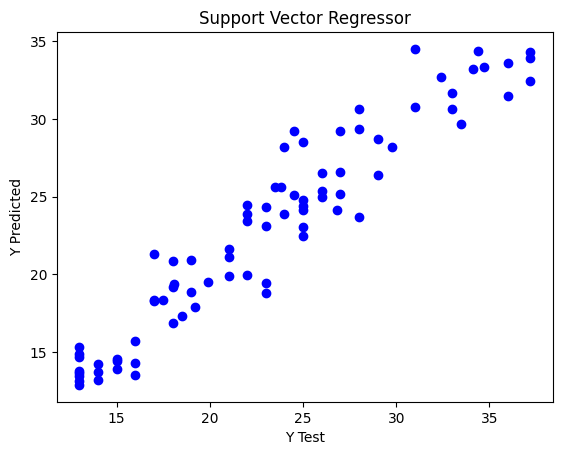

In [93]:
# Fitting the training Data to the SVR Model
svr_model = SVR(kernel='rbf')  
svr_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_SVR = svr_model.predict(x_test)

R2_score_svr = (r2_score(y_test, y_pred_SVR) * 100).round(2)
mse_svr = mse(y_test, y_pred_SVR).round(2)
# Printing R2 score and MSE
print("The R2 Score:", R2_score_svr, "%")
print("The Mean Squared Error:", mse(y_test, y_pred_SVR).round(2))

# Plotting the results
plt.scatter(y_test, y_pred_SVR, color='blue')
plt.title('Support Vector Regressor')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

## iv)Gradient Boosting Regressor

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoosting = GradientBoostingRegressor(random_state=42)
'''
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.5],     # Learning rate (shrinkage)
    'max_depth': [3, 5, 7],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be at a leaf node
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoosting, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)'''

'\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],        # Number of trees in the forest\n    \'learning_rate\': [0.01, 0.1, 0.5],     # Learning rate (shrinkage)\n    \'max_depth\': [3, 5, 7],                # Maximum depth of each tree\n    \'min_samples_split\': [2, 5, 10],       # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4]          # Minimum number of samples required to be at a leaf node\n}\n\n# Instantiate GridSearchCV\ngrid_search = GridSearchCV(estimator=GradientBoosting, param_grid=param_grid, cv=5, scoring=\'neg_mean_squared_error\', verbose=1, n_jobs=-1)\n\n# Fit GridSearchCV\ngrid_search.fit(x_train, y_train)\n\n# Print the best parameters and best score\nprint("Best Parameters:", grid_search.best_params_)'

R2 Score: 90.97 %
Mean Squared Error: 4.38


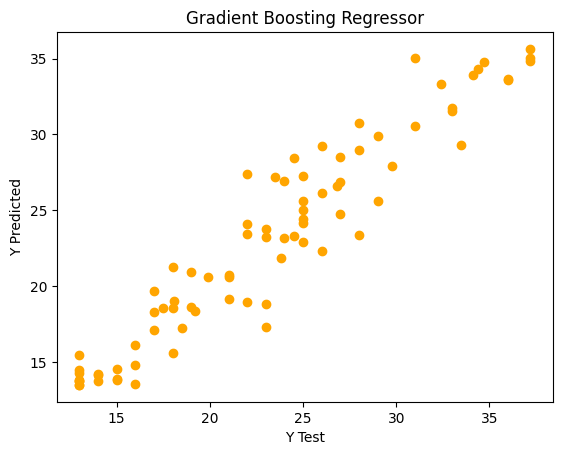

In [95]:
# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(learning_rate=0.1,max_depth=3, min_samples_leaf=1,n_estimators=50)

# Fit the model
gb_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_gb = gb_regressor.predict(x_test)

r2_score_gbr = (r2_score(y_test, y_pred_gb)*100).round(2)
mse_gbr = mse(y_test, y_pred_gb).round(2)

# Evaluate the model
print("R2 Score:",r2_score_gbr ,"%")
print("Mean Squared Error:", mse_gbr)

plt.scatter(y_test,y_pred_gb,color='orange')
plt.title('Gradient Boosting Regressor')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

# 6.Model Evaluation

+---------------------------+----------+---------------------+
|           Model           | R2 Score | Mean Squarred Error |
+---------------------------+----------+---------------------+
|   RandomForestRegressor   |   92.0   |        3.84         |
| Support Vector Regressor  |  91.04   |        4.35         |
| GradientBoostingRegressor |  90.97   |        4.38         |
|     LinearRegression      |   83.9   |        7.82         |
+---------------------------+----------+---------------------+


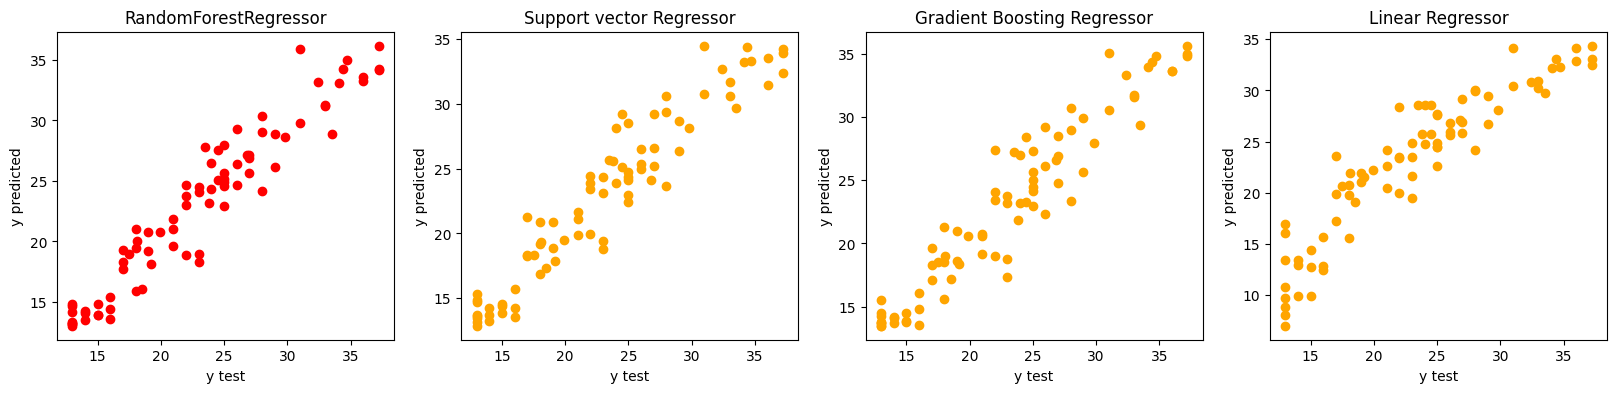

In [96]:
# Tabulating the R2 score and MSE Score
table = [
    ['RandomForestRegressor',r2_score_randomforest,mse_randomforest],
    ['Support Vector Regressor',R2_score_svr,mse_svr],
    ['GradientBoostingRegressor', r2_score_gbr,mse_gbr],
    ['LinearRegression',r2_score_linear,mse_linear],
]

# Display the table using tabulate
print(tabulate(table, headers=['Model','R2 Score', 'Mean Squarred Error'], tablefmt='pretty'))

bins=[y_pred_Randomforest,y_pred_SVR,y_pred_gb,y_pred_Linear_Regression]
colors = ['Red','orange','orange','orange']
title = ['RandomForestRegressor','Support vector Regressor','Gradient Boosting Regressor','Linear Regressor']

plt.figure(figsize=(20,4))
for j, (bin_data, color, title) in enumerate(zip(bins, colors, title), 1):
    plt.subplot(1,4,j)
    plt.scatter(y_test,bin_data,color=color)
    plt.title(title)

    plt.xlabel('y test')
    plt.ylabel('y predicted')

plt.show()


## Conclusion
* Among the four models evaluated, the Random Forest Regressor outperforms the others in terms of both R2 score and Mean Squared Error (MSE). Therefore, we conclude that the Random Forest Regressor is the most suitable model for deployment.


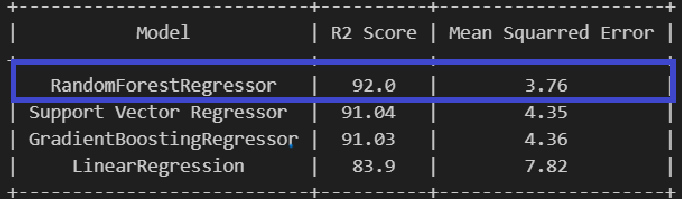   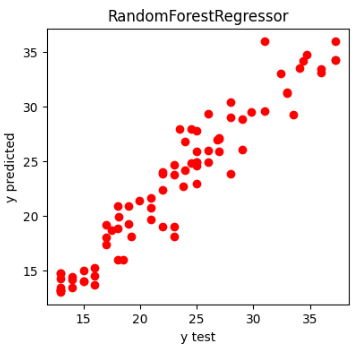

# 7. Model Dump

In [97]:
from joblib import dump

dump(Random_Forest_Regressor_model,'Fuel_efficiency_dumpfile.joblib')
dump(Standard_Scaler,'Standard_Scaler_dumpfile.joblib')

['Standard_Scaler_dumpfile.joblib']